# International Sports Events: Window Dressing and Repression

Author: Ioannis Vougias
ioannisvougias@hotmail.com

This notebook contains a partial replication of the below study on the relationship between repression in autocratic regimes and international sports events:

* Scharpf, A., Gläßel, C., Pearce, E. (2022) *International Sports Events and Repression in Autocracies: Evidence from the 1978 FIFA World Cup*, American Political Science Review, 1-18.  https://doi:10.1017/S0003055422000958.


This is the dataset provided by the authors at https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/RJY34I

Files you need to run this notebook: 

* 'main_data.tab'
* 'figure_1_data.tab'
* 'figure_SI11_data.tab'

In [1]:
#Import the necessary libraries we will use throughout this notebook.

#For data manipulation
import pandas as pd
import numpy as np
import math
import json

#For visualizations
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as patches

#For statistical analysis
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats.stats as stats
from statsmodels.formula.api import logit
from statsmodels.graphics.api import plot_regress_exog

### 1. Overview

To familiriaze with the datasets, we will replicate the following parts of the study.

Overview contains:

* a replication of the Table SI.3.1 and SI.3.2 of the Supporting Information 

* a replication of the Figure 1 of the main paper and Figure SI.1.1 from the Supporting Information.

In [2]:
#Read the file that contains the data we need to replicate Table SI.3.1 and SI.3.2 of the Supporting Information.
main_data = pd.read_csv("main_data.tab", sep="\t")
main_data.head(5)

#Prin column headers
for column_headers in main_data.columns: 
    print(column_headers)

muni
id
prov
id_prov
muniprov
repression
lnrepression
dumrepression
hostcity
hostcitynum
date
month_date
prewc_time3m
time
time2
time3
time_long
time2_long
time3_long
hostcitytime
hostcitytime2
hostcitytime3
hostcitytime_long
hostcitytime2_long
hostcitytime3_long
prox_hotelonly
prox_hotelonly_time
prox_hotelonly_time2
prox_hotelonly_time3
prox_hotelpress
prox_hotelpress_time
prox_hotelpress_time2
prox_hotelpress_time3
postwc_time3mdum
time_postwc
time2_postwc
time3_postwc
lnpop_1970
literacy_avg
vote_frejuli
lnrebact1974
lnrepression70_77
latitude
lnstrikes
lnlag_strikes
lnlag2_strikes
biweek1
biweek2
biweek3
biweek4
biweek5
biweek6
biweek7
biweek8
biweek9
biweek10
biweek11
biweek12
biweek13
biweek14
biweek15
hcXbiweek1
hcXbiweek2
hcXbiweek3
hcXbiweek4
hcXbiweek5
hcXbiweek6
hcXbiweek7
hcXbiweek8
hcXbiweek9
hcXbiweek10
hcXbiweek11
hcXbiweek12
hcXbiweek13
hcXbiweek14
hcXbiweek15
zone1
zone2
zone3
zone4
zone5
prov1
prov2
prov3
prov4
prov5
prov6
prov7
prov8
prov9
prov10
prov11
prov12
prov1

#### 1.1 Summary Statistics (Main analyses)
We create a dataframe that contains the data for the Summary statistics (Main analyses) table, Table SI.3.1. 

* This means we need to select the data with the condition that the column 'Time' is not NaN.

This is because we analyse the data up until the world cup finished and the variable 'Time' is the indicator of this.

Time takes values from 0.0 to 1.17, for 117 days we have data for, including the days during the World-Cup period.

In [3]:
#'Time' is not NaN condition
main_analyses = main_data[main_data['time'].notna()]

#The columns we need to replicate the Table
columns =  ["repression", 
            "lnrepression", 
            "dumrepression", 
            "hostcity",
            "prox_hotelonly", 
            "prox_hotelpress",
            "time",
            "time2", 
            "time3", 
            "lnpop_1970", 
            "literacy_avg",
            "lnrebact1974",
            "vote_frejuli", 
            "lnrepression70_77",
            "latitude",
            "lnstrikes",
            "lnlag_strikes",
            "lnlag2_strikes",
            "zone1",
            "zone2",
            "zone3",
            "zone4",
            "zone5"]

#Save the descriptive statistics we need
ma = main_analyses[columns].describe()

#Transose the table so the stats are in the columns
ma_transposed = ma.T

#Keep the stats we need
ma_transposed = ma_transposed[['count','mean','std','min','max']]

#Copy the dataframe to convert count column to int
ma_mod = ma_transposed.copy()

#Convert count as int
ma_mod['count'] = ma_mod['count'].astype(int)

#Round the numbers to 3 decimals
ma_mod = ma_mod.round(3)


#Rename the index for a better understanding of the variables
ma_mod = ma_mod.rename(index={'repression': 'Repression events, Count',
                              'lnrepression': 'Repression events, Continous',
                              'dumrepression': 'Repression events, Binary',
                              'hostcity': 'Host City',
                              'prox_hotelonly': 'Proximity to Hotel',
                              'prox_hotelpress': 'Proximity to Journalist Venue',
                              'time': 'Time',
                              'time2': 'Time\u00b2',
                              'time3': 'Time\u00b3',
                              'lnpop_1970': 'Population Size',
                              'vote_frejuli': 'Peronist vote share',
                              'literacy_avg': 'Literacy rate',
                              'lnrebact1974': 'Rebel activity',
                              'lnrepression70_77': 'Past Repression',
                              "latitude": 'Latitude',
                              "lnstrikes": 'Protest, Current month',
                              "lnlag_strikes": 'Protest, One month ago',
                              "lnlag2_strikes": 'Protest, Two months ago',
                              'zone1':'Military Zone 1',
                              'zone2':'Military Zone 2',
                              'zone3':'Military Zone 3',
                              'zone4':'Military Zone 4',
                              'zone5':'Military Zone 5'})

#Print the final table
ma_mod

,count,mean,std,min,max
"Repression events, Count",58107,0.005,0.104,0.000,7.000
"Repression events, Continous",58107,0.003,0.053,0.000,2.079
"Repression events, Binary",58107,0.003,0.058,0.000,1.000
Host City,58383,0.010,0.100,0.000,1.000
Proximity to Hotel,58107,7.000,1.613,0.000,9.398
Proximity to Journalist Venue,58107,7.079,1.629,0.000,9.398
Time,58383,0.590,0.338,0.010,1.170
Time²,58383,0.462,0.411,0.000,1.369
Time³,58383,0.407,0.460,0.000,1.602
Population Size,56628,9.701,1.336,6.057,14.905


#### 1.2 Summary Statistics (Post-World Cup period)
We create a dataframe that contains the data for the Summary statistics (Post-World Cup period) table, Table SI.3.2. 

* This means we need to select the data with the condition that the column 'post_wc' is not NaN.

This is because we analyse the data after the world cup started and the variable 'postwc_time3mdum' is the indicator of this.

In [4]:
#'postwc_time3mdum' is not NaN condition
post_wc = main_data[main_data['postwc_time3mdum'].notna()]

#The columns we need to replicate the Table
columns =  ["repression", 
            "lnrepression", 
            "hostcity", 
            "postwc_time3mdum",
            "time_postwc", 
            "time2_postwc",
            "time3_postwc",
            "lnpop_1970", 
            "vote_frejuli", 
            "literacy_avg", 
            "lnrebact1974", 
            "lnrepression70_77", 
            "zone1",
            "zone2",
            "zone3",
            "zone4",
            "zone5"]

#Save the descriptive statistics we need
pw = post_wc[columns].describe()

#Transose the table so the stats are in the columns
pw_transposed = pw.T

#Keep the stats we need
pw_transposed = pw_transposed[['count','mean','std','min','max']]

#Copy the dataframe to convert count column to int
pw_mod = pw_transposed.copy()

#Convert count as int
pw_mod['count'] = pw_mod['count'].astype(int)

#Round the numbers to 3 decimals
pw_mod = pw_mod.round(3)


#Rename the index for a better understanding of the variables
pw_mod = pw_mod.rename(index={'repression': 'Repression events, Count',
                              'lnrepression': 'Repression events, Continous',
                              'hostcity': 'Host City',
                              'postwc_time3mdum':'Post World Cup Period',
                              'time_postwc':'Time, Post World Cup', 
                              'time2_postwc': 'Time\u00b2, Post World Cup',
                              'time3_postwc': 'Time\u00b3, Post World Cup',
                              'lnpop_1970': 'Population Size',
                              'vote_frejuli': 'Peronist vote share',
                              'literacy_avg': 'Literacy rate',
                              'lnrebact1974': 'Rebel activity',
                              'lnrepression70_77': 'Past Repression',
                              'zone1':'Military Zone 1',
                              'zone2':'Military Zone 2',
                              'zone3':'Military Zone 3',
                              'zone4':'Military Zone 4',
                              'zone5':'Military Zone 5'})

#Print the final table
pw_mod

,count,mean,std,min,max
"Repression events, Count",58321,0.004,0.096,0.000,9.000
"Repression events, Continous",58321,0.002,0.047,0.000,2.303
Host City,58383,0.010,0.100,0.000,1.000
Post World Cup Period,58383,0.786,0.410,0.000,1.000
"Time, Post World Cup",58383,0.590,0.338,0.010,1.170
"Time², Post World Cup",58383,0.462,0.411,0.000,1.369
"Time³, Post World Cup",58383,0.407,0.460,0.000,1.602
Population Size,56628,9.701,1.336,6.057,14.905
Peronist vote share,57447,58.752,11.539,28.500,94.300
Literacy rate,56628,0.717,0.110,0.316,0.901


#### 1.3  Figure 1. Autocratic Hosts of International Sports Events, 1990–2024

In this figure, we need the appropriate file containing the data to replicate this figure. 

File name we need: "figure_1_data.tab"

In [5]:
#Read the file with the data to visualize figure 1 of the main paper.
datafig1 = pd.read_csv("figure_1_data.tab", sep="\t")

#Create a list with the timeframes we want to label
timeframes = ['1990-1994', '1995-1999', '2000-2004', '2005-2009','2010-2014','2015-2019','2020-2024']

#Create a column on the dataframe with the timeframes 
datafig1['five_year_share'] = timeframes

#Print the dataframe
datafig1

,postcwy,event_selec,autochost,autochostperc,five_year_share
0,1.0,25.0,2.0,8.000000,1990-1994
1,2.0,31.0,4.0,12.903226,1995-1999
2,3.0,25.0,5.0,20.000000,2000-2004
3,4.0,24.0,6.0,25.000000,2005-2009
4,5.0,30.0,6.0,20.000000,2010-2014
5,6.0,32.0,9.0,28.125000,2015-2019
6,7.0,27.0,10.0,37.037037,2020-2024


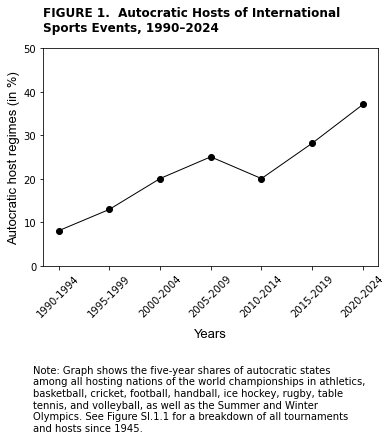

In [6]:
#Make the figure's resolution higher
plt.rcParams['figure.dpi'] = 100

#Plot the figure
datafig1.plot(x="five_year_share", y="autochostperc",legend=None, marker = 'o',color='black',linewidth=1)

#Edit the x and y label parameters
plt.xlabel('Years',fontsize = 13, fontfamily = 'Arial', labelpad = 10)
plt.ylabel('Autocratic host regimes (in %)',fontsize = 13,fontfamily = 'Arial')

#Set y limits
plt.ylim([0, 50])

#Rotate the ticks so they don't overlap
plt.xticks(rotation = 45)

#Add figure title
plt.title("""FIGURE 1.  Autocratic Hosts of International
Sports Events, 1990–2024""", y=1.05, loc='left', fontweight="bold")


#Add note text
plt.text(-0.5,-38,"""Note: Graph shows the five-year shares of autocratic states
among all hosting nations of the world championships in athletics,
basketball, cricket, football, handball, ice hockey, rugby, table
tennis, and volleyball, as well as the Summer and Winter
Olympics. See Figure SI.1.1 for a breakdown of all tournaments
and hosts since 1945.""")

#Show the figure
plt.show()

#### 1.4 Figure SI.1.1 Host regimes of international sports event, 1945-2024

In this figure we need the file containing the data to replicate this figure. 

File name we need: "figure_SI11_data.tab"

In [7]:
#Read the file with the data to visualize figure SI.1.1 of the Supportive Information.
datafigSI11 = pd.read_csv("figure_SI11_data.tab", sep="\t")

In [8]:
#Create a list of conditions to match the column 'baseline' with the appropriate tournament name
conditions = [
    (datafigSI11['baseline'] == 2.5),
    (datafigSI11['baseline'] == 5.0),
    (datafigSI11['baseline'] == 7.5),
    (datafigSI11['baseline'] == 10.0),
    (datafigSI11['baseline'] == 12.5),
    (datafigSI11['baseline'] == 15.0),
    (datafigSI11['baseline'] == 17.5),
    (datafigSI11['baseline'] == 20.0),
    (datafigSI11['baseline'] == 22.5),
    (datafigSI11['baseline'] == 25.0),
    (datafigSI11['baseline'] == 27.5)]

#Create a list with the tournament names
tour_names = ["Volleyball World Championship",
              "Basketball World Cup",
              "World Table Tennis Championships",
              "World Handball Championship",
              "Cricket World Cup",
              "FIFA World Cup",
              "Ice Hockey World Championships",
              "World Athletics Championships",
              "Summer Olympic Games",
              "Winter Olympic Games",
              "Rugby World Cup"]

#Create a new column matching the baseline with the tournament names
datafigSI11['Tournament'] = np.select(conditions, tour_names)

#Replace 0 to 1 and 1 to -1 in the column 'regime_mod' so we can visualize the spikes.
datafigSI11['regime_mod'] = datafigSI11['regime'].replace([0,1], [1,-1])


#Create a list with all the dataframes containing the data for each tournament
datafigs = []
for x in tour_names:
    datafigs.append(datafigSI11[datafigSI11['Tournament'] == x])

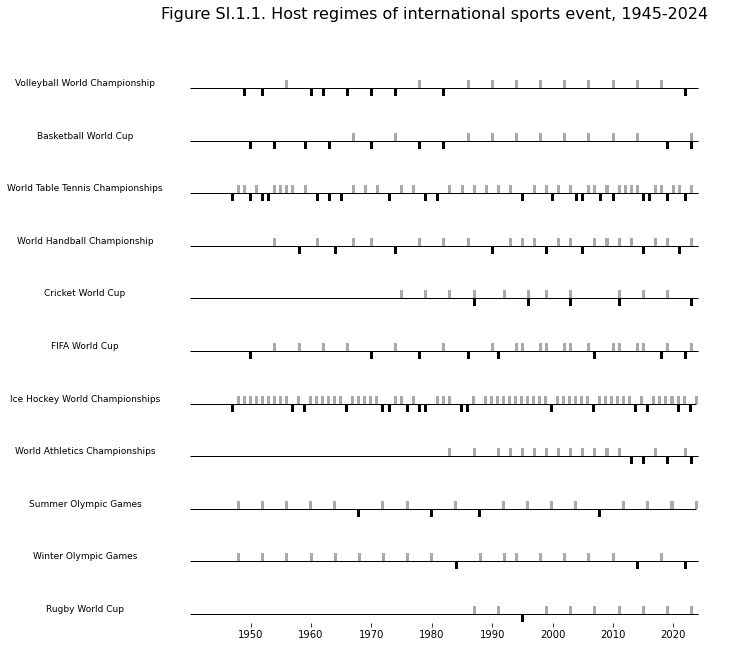

In [9]:
#Set the customs x-ticks we want
xticks = [1950,1960,1970,1980,1990,2000,2010,2020]

#Create as many figures as the tournaments
fig, ax = plt.subplots(11, figsize=(10,10))

#Have a height space of 2 between each subplot
plt.subplots_adjust(hspace=2)

#Reverse the list of the dataframes so the last item plotted on top
datafigs = datafigs[::-1]

#Create figure title
fig.suptitle('Figure SI.1.1. Host regimes of international sports event, 1945-2024', fontsize=16)

#Plot every subplot based on every tournament dataframe
for i,figure in enumerate(datafigs):
    plt.subplot(11, 1, i+1)
    plt.bar(figure['year'], figure['regime_mod'], width = 0.5, 
            color=(figure['regime_mod'] > 0).map({True: 'darkgrey', False: 'k'}))
    
    plt.box(False)
    plt.xticks(xticks,xticks)
    plt.hlines(y=0,xmin =1940,xmax=2024,  linewidth=1, color='k')
    
    #For the last plot let the x-ticks be plotted
    if i!= 10:
        plt.tick_params(
            axis='x',          # changes apply to the x-axis
            bottom=False,      # ticks along the bottom edge are off
            labelbottom=False) # labels along the bottom edge are off
        
    
    plt.tick_params(
        axis='y', 
        left=False,  # changes apply to the y-axis
        labelleft=False) # labels along the bottom edge are off
    
    #Parameters for y-label
    plt.ylabel((tour_names[i]),fontsize=9,rotation=0,labelpad = 80)
    

#Print plots
plt.show()

### 2. Repression in Departments with and without Host Cities

The authors formulate two hypotheses:

* H1: In the run-up to an international sports tournament, state repression spikes in host cities, but not in other cities.

* H2: During an international sports tournament, state repression drops in host cities but remains unchanged in other cities.

They validate their hypotheses using a series of regression analyses. They use negative binomial regression models, but they find that their findings are robust with Ordinary Least Squares (OLS), so we'll use OLS.

We run the three first models of Table 1 of the main paper, which correpond to columns (1)-(3) and make an interpretation on the results.

In [10]:
#Create list of variables for OLS model 1
model_var_1  = "hostcitytime + hostcitytime2 + hostcity + time + time2"

#Create the OLS model
lnreg1 = smf.ols("lnrepression ~" + model_var_1, data=main_analyses)

#Full fit of the model.
lnreg1_res = lnreg1.fit()

#Create list to fill the wanted parameters
parlist1 = []

#Insert the parameters
parlist1 = lnreg1_res.params

#Get the R squared
rsquared1 = float(lnreg1_res.rsquared)

#Round to two digits
rsquared1 = round(rsquared1,2)

#Get the total observations
obs1 = int(lnreg1_res.nobs)

#Print the summary statistics
lnreg1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     554.0
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:42:11   Log-Likelihood:                 89824.
No. Observations:               58107   AIC:                        -1.796e+05
Df Residuals:                   58101   BIC:                        -1.796e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0026      0.001      3.912      0.000       0.001       0.004
hostcitytime      0.4012      0.026     15.680      0.000       0.351       0.451
hostcitytime2    -0.3230      0.021    -15.372      0.000      -0.364      -0.282
hostcity          0.0202      0.007      3.086      0.002       0.007       0.033
time             -0.0028      0.003     -1.106      0.269      -0.008       0.002
time2             0.0020      0.002      0.959      0.338      -0.002       0.006
==============================================================================
Omnibus:                   125118.610   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        514921392.904
Skew:                          19.504   Prob(JB):                         0.00
Kurtosis:                     462.518   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
#Create list of variables for OLS model 2, add more variables to the previous model
model_var_2  = model_var_1 + "+ lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77"

#Create the OLS model
lnreg2 = smf.ols("lnrepression ~" + model_var_2, data=main_analyses)

#Full fit of the model
lnreg2_res = lnreg2.fit()

#Create list to fill the wanted parameters
parlist2 = []

#Insert the parameters
parlist2 = lnreg2_res.params

#Get the R squared
rsquared2 = float(lnreg2_res.rsquared)

#Round to two digits
rsquared2 = round(rsquared2,2)
       
#Get the total observations    
obs2 = int(lnreg2_res.nobs)
    
#Print the summary statistics   
lnreg2_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     350.4
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:42:11   Log-Likelihood:                 86804.
No. Observations:               56394   AIC:                        -1.736e+05
Df Residuals:                   56383   BIC:                        -1.735e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0041      0.003     -1.181      0.238      -0.011       0.003
hostcitytime          0.4014      0.026     15.582      0.000       0.351       0.452
hostcitytime2        -0.3231      0.021    -15.276      0.000      -0.365      -0.282
hostcity             -0.0037      0.007     -0.555      0.579      -0.017       0.009
time                 -0.0030      0.003     -1.161      0.246      -0.008       0.002
time2                 0.0022      0.002      1.007      0.314      -0.002       0.006
lnpop_1970            0.0010      0.000      3.900      0.000       0.000       0.001
vote_frejuli       -3.22e-05   2.31e-05     -1.394      0.163   -7.75e-05    1.31e-05
literacy_avg         -0.0056      0.003     -1.962      0.050      -0.011   -4.52e-06
lnrebact1974         -0.0001      0.000     -0.848      0.396      -0.000       0.000
lnrepression70_77     0.0041      0.000     17.407      0.000       0.004       0.005
==============================================================================
Omnibus:                   119962.002   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        462693274.775
Skew:                          18.965   Prob(JB):                         0.00
Kurtosis:                     445.123   Cond. No.                     9.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
#Create list of variables for OLS model 3, add more variables to the previous model
model_var_3  = model_var_2 + "+ zone1 + zone2 + zone3 + zone4 + zone5"

#Create the OLS model
lnreg3 = smf.ols("lnrepression ~" + model_var_3, data=main_analyses)

#Full fit of the model
lnreg3_res = lnreg3.fit()

#Create list to fill the wanted parameters
parlist3 = []

#Insert the parameters
parlist3 = lnreg3_res.params

#Get the R squared
rsquared3 = float(lnreg3_res.rsquared)

#Round to two digits
rsquared3 = round(rsquared3,2)

#Get the total observations  
obs3 = int(lnreg3_res.nobs)

#Print the summary statistics 
lnreg3_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     271.8
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:42:11   Log-Likelihood:                 86946.
No. Observations:               56394   AIC:                        -1.739e+05
Df Residuals:                   56379   BIC:                        -1.737e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0106      0.003     -3.378      0.001      -0.017      -0.004
hostcitytime          0.4014      0.026     15.620      0.000       0.351       0.452
hostcitytime2        -0.3231      0.021    -15.313      0.000      -0.364      -0.282
hostcity             -0.0040      0.007     -0.606      0.544      -0.017       0.009
time                 -0.0030      0.003     -1.164      0.244      -0.008       0.002
time2                 0.0022      0.002      1.009      0.313      -0.002       0.006
lnpop_1970            0.0033      0.000     11.129      0.000       0.003       0.004
vote_frejuli       1.047e-05   2.78e-05      0.376      0.707   -4.41e-05     6.5e-05
literacy_avg         -0.0231      0.003     -7.021      0.000      -0.030      -0.017
lnrebact1974         -0.0014      0.000     -8.474      0.000      -0.002      -0.001
lnrepression70_77     0.0032      0.000     12.471      0.000       0.003       0.004
zone1                 0.0066      0.001      7.972      0.000       0.005       0.008
zone2                -0.0080      0.001     -9.205      0.000      -0.010      -0.006
zone3                -0.0050      0.001     -5.339      0.000      -0.007      -0.003
zone4                -0.0015      0.002     -0.960      0.337      -0.005       0.002
zone5                -0.0026      0.001     -3.215      0.001      -0.004      -0.001
==============================================================================
Omnibus:                   119662.654   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        456844768.904
Skew:                          18.855   Prob(JB):                         0.00
Kurtosis:                     442.318   Cond. No.                     1.49e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.25e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [13]:
#Create a df with the three models and their parameters
regres =  pd.DataFrame({'(1)': pd.Series(parlist1), '(2)': pd.Series(parlist2),'(3)': pd.Series(parlist3)})

#Round the float numbers to 3 decimals
regres = regres.round(3)

#Reindex the dataframe to have the exact order as in the paper
regres  = regres.reindex(
    index = ["hostcitytime", "hostcitytime2","hostcity","time","time2","lnpop_1970","vote_frejuli",
             "literacy_avg","lnrebact1974","lnrepression70_77","zone1","zone2","zone3","zone4","zone5"])

#Rename the index for a better understanding of the parameters
regres = regres.rename(index={'hostcitytime': 'Host City x Time',
                              'hostcitytime2': 'Host City x Time\u00b2',
                              'hostcity': 'Host City',
                              'time': 'Time',
                              'time2': 'Time\u00b2',
                              'lnpop_1970': 'Population Size',
                              'vote_frejuli': 'Peronist vote share',
                              'literacy_avg': 'Literacy rate',
                              'lnrebact1974': 'Rebel activity',
                              'lnrepression70_77': 'Past Repression',
                              'zone1':'Military Zone 1',
                              'zone2':'Military Zone 2',
                              'zone3':'Military Zone 3',
                              'zone4':'Military Zone 4',
                              'zone5':'Military Zone 5'})

In [14]:
#Create new line for the R squared of each model
regres.loc["R\u00b2"] = [rsquared1,rsquared2,rsquared3]

#Create new line for the observations of each model
regres.loc['Observations'] = [obs1,obs2,obs3]

#Print the final dataframe with the 3 OLS models
regres

,(1),(2),(3)
Host City x Time,0.401,0.401,0.401
Host City x Time²,-0.323,-0.323,-0.323
Host City,0.020,-0.004,-0.004
Time,-0.003,-0.003,-0.003
Time²,0.002,0.002,0.002
Population Size,NaN,0.001,0.003
Peronist vote share,NaN,-0.000,0.000
Literacy rate,NaN,-0.006,-0.023
Rebel activity,NaN,-0.000,-0.001
Past Repression,NaN,0.004,0.003


#### Result Interpretation

The dataframe above contains 3 models of  Linear regressions (OLS) for repression in departments with and without host cities


* Our dependent variable is repression

* Our explanatory variables are time and space. 

* Our control variables are Population Size, Peronist vote share, Literacy rate, Rebel activity, Past Repression. We need those variables to see if they affect the results. 

* Military Zones are extra variables 

In the first model we have only our explanatory variables and their interactions.

In the second model we add these control variables to see if the results change

In the third model we add also the military zones to see if the results change



The variable Time is a running number of days, starting from March
1 through June 25. 

Its quadratic term Time2 accounts
for the inverted U-shaped relationship stated by
Hypotheses 1 and 2. 

In statistics and econometrics, a quadratic term is a term in a regression model that is squared. This term captures the curvature in the relationship between the independent and the outcome variables, and allows the model to fit a non-linear relationship.

In the case of an inverted U-shaped relationship, a quadratic term would allow the model to fit a curve that increases at first, reaches a peak, and then decreases again.



We distinguish between host and nonhost venues at the
department level. The variable Host City indicates
whether a given department includes a host city (coded
as 1) or not (coded as 0).

To capture the hypothesized
dynamics of repression in host and nonhost cities
before and during the tournament, we have the interaction of Host
City with Time and Time2, respectively.

##### Regarding Hypothesis (1)
In the run-up to the World Cup, repression spiked within host cities but not in others 

The coefficient of the interaction term between Host City and
Time is positive (0.401 across all the three models) and statistically significant (p-value < 0.01) supporting Hypothesis 1.

The positive coefficient indicates that as the value of the interaction of Host
City with Time variable increases, the mean of repression also tends to increase. Which means that if the department contains a Host City, as the time progresses until the beggining of the world cup, repression increases. While if the department is not a Host City, repression remains the same.

##### Regarding Hypothesis (2)
During the tournament, state violence essentially stopped across the country 

Likewise, the coefficient of the interaction term between Host
City and Time2 is negative (-0.323) and statistically significant(p-value < 0.01) across all models, which offers further support to Hypothesis 2.

The negative coefficient suggests that as the interaction of Host City and Time2 increases, repression tends to decrease. This means that after the spike before the world cup begins, repression has a significant downfall.

The value  𝑅 squared >=0.5 means that our model explains more than 50% of the variation of the repression events to Time and Host City.

###### Summary
The positive coefficient of the interaction
between Host City and Time and the negative coefficient of the interaction between Host City and Time2
indicate that repression in host cities first went up and then again dropped. We can see that the control variables essentially play no role in the repression strategy of the Argentinian Regime.

### 3. Graphical Overview of Effects 

This is a replicate of the Figure 5 of the main paper using our own model.

In [15]:
#Create list of variables for manual matching OLS model 3
main_model_var  = "hostcitytime + hostcitytime2 + hostcity + time + time2 + lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77 + zone1 + zone2 + zone3 + zone4 + zone5"

#Create the OLS model
main_model = smf.ols("repression ~" + main_model_var, data=main_analyses)

#Full fit of the model.
main_model_res = main_model.fit()

# Calculate the predicted values of the outcome variable
main_predicted = main_model_res.predict(main_analyses[["hostcitytime","hostcitytime2",
                                                "hostcity","time","time2",'lnpop_1970',
                                                'vote_frejuli','literacy_avg','lnrebact1974','lnrepression70_77',
                                                'zone1','zone2','zone3','zone4','zone5']])

# Calculate the confidence intervals for the predicted values
main_pred_conf_int = main_model_res.conf_int(alpha=0.05)

# Print the confidence intervals
print(main_pred_conf_int)

#Calculate the mean confidence intervals, lower and upper bounds
ci = main_pred_conf_int.mean(axis=0)

                          0         1
Intercept         -0.030977 -0.006751
hostcitytime       0.802939  1.002304
hostcitytime2     -0.793777 -0.630101
hostcity          -0.073946 -0.022396
time              -0.016583  0.003722
time2             -0.003683  0.012987
lnpop_1970         0.004563  0.006836
vote_frejuli      -0.000077  0.000139
literacy_avg      -0.053661 -0.028110
lnrebact1974      -0.003132 -0.001854
lnrepression70_77  0.004449  0.006416
zone1              0.009366  0.015831
zone2             -0.017152 -0.010386
zone3             -0.012353 -0.005025
zone4             -0.010902  0.001388
zone5             -0.007388 -0.001107


In [16]:
#Add the predictions to the dataframe
main_analyses = main_analyses.copy()
main_analyses['predicted'] = main_predicted

#Create dataframe with only the host cities included
main_hostcity_yes = main_analyses[main_analyses['hostcity'] == 1.0]

#Check for NaN values on 'time'
main_hostcity_yes = main_hostcity_yes[main_hostcity_yes['time'].notna()]

In [17]:
#Group by 'time' to calculate the daily predicted repression events
main_final_n = main_hostcity_yes.groupby("time")["predicted"].mean().reset_index(name='Sum')

#Group by 'time' to calculate the daily protest events
main_final_r = main_hostcity_yes.groupby("time")["lnstrikes"].mean().reset_index(name='Protest')

In [18]:
#Create dataframe with only the host cities included
main_hostcity_no = main_analyses[main_analyses['hostcity'] == 0.0]

#Check for NaN values on 'time'
main_hostcity_no = main_hostcity_no[main_hostcity_no['time'].notna()]

#Group by 'time' to calculate the daily predicted repression events
main_final_nh = main_hostcity_no.groupby("time")["predicted"].mean().reset_index(name='Sum')

#Group by 'time' to calculate the daily protest events
main_final_ph = main_hostcity_no.groupby("time")["lnstrikes"].mean().reset_index(name='Protest')

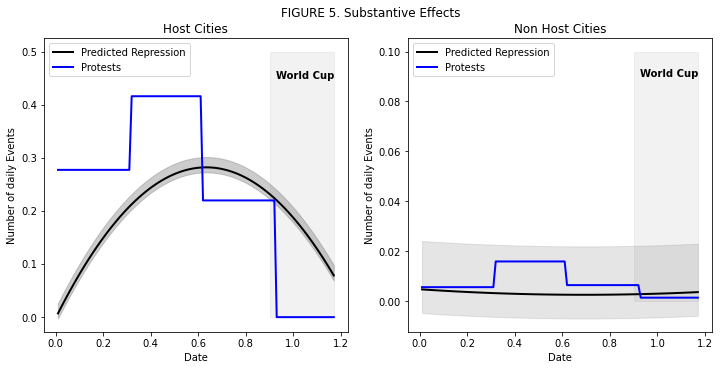

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 5))
fig.suptitle('FIGURE 5. Substantive Effects', fontsize=12)
fig.tight_layout()
plt.subplots_adjust(wspace=0.2)

#Host Cities subplot parameters

#Plot the two graphs on the host cities subplot
ax1.plot(main_final_n["time"],main_final_n['Sum'],label='Predicted Repression',color='black',linewidth=2,linestyle="-")
ax1.plot(main_final_r["time"],main_final_r['Protest'],label='Protests',color='blue',linewidth=2,linestyle="-")

#Confidence intervals
ciu = main_pred_conf_int[0][0] + ci[1]
cil = main_pred_conf_int[1][0] + ci[0]

#Plot the confidence intervals on both the plots
ax1.fill_between(main_final_n["time"], (main_final_n['Sum']- cil), (main_final_n['Sum']+ciu), color='gray', alpha=0.4)

#Set x and y labels
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of daily Events')

#Add subplot 1 title text
ax1.title.set_text('Host Cities')

#Add World-cup patch
rect = patches.Rectangle((0.9, 0), width=0.27, height=0.5, color='grey', alpha=0.1)
ax1.add_patch(rect)

#Add world-cup text
ax1.text(0.925,0.45,"World Cup",weight='heavy')

#Set the legend position
ax1.legend(loc ='upper left')


#Non Host Cities subplot parameters

#Plot the two graphs on the host cities subplot
ax2.plot(main_final_nh ["time"],main_final_nh ['Sum'],label='Predicted Repression',color='black',linewidth=2,linestyle="-")
ax2.plot(main_final_ph["time"],main_final_ph['Protest'],label='Protests',color='blue',linewidth=2,linestyle="-")

#Plot the confidence intervals on both the plots
ax2.fill_between(main_final_nh["time"], (main_final_nh['Sum']- cil), (main_final_nh['Sum']+ciu), color='gray', alpha=0.2)

#Set x and y labels
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of daily Events')

#Add subplot 1 title text
ax2.title.set_text('Non Host Cities')

#Add World-cup patch
rect2 = patches.Rectangle((0.9, 0), width=0.27, height=0.1, color='grey', alpha=0.1)
ax2.add_patch(rect2)

#Add world-cup text
ax2.text(0.925,0.09,"World Cup",weight='heavy')

#Set the legend position
ax2.legend(loc ='upper left')

#### Result Interpretation

We used a OLS regression model on the whole dataset to predict the daily number of repression events on departments with host cities and without them. We also showed the pattern of protests during the same period.

The graph  shows the predicted numbers of daily repression events in departments with host cities and in other departments the daily protests in the same departments. We can see that right before the world-cup beggins the protests started to decrease as repression reached the highest point. During the world-cup protests almost got to zero showing that the Argentinian strategy played a significant role to reach the desired results. Meaning that the increase in repression right before the world-cup discouraged people from protesting. 

We can see a similar pattern on the departments with non host cities indicating a domino effect on protesting. Meaning that as people viewed more repression their willingness to protest significantly lowered.

Both graphs validate the two hypotheses of the paper.

### 4. Robustness Check Using a Dichotomous Indicator of Repression

As an additional robustness check, the authors run logistic regressions using a binary outcome variable for regression. They report their results in Table SI.4.5 of the Supplementary Information;

We replicate these results.

* We will now create three (3) Logistic Regression Models on the dependent variable 'dumrepression'

In [20]:
#Create list of variables for Logistic Regression model 1
model_logitvar_1  = "hostcitytime + hostcitytime2 + hostcity + time + time2"

#Create the Logistic Regression model
logit1 = logit("dumrepression ~" + model_logitvar_1 , data=main_analyses)

#Full fit of the model.
logit1_res = logit1.fit()

#Create list to fill the wanted parameters
parlogitlist1 = []

#Insert the parameters
parlogitlist1 = logit1_res.params

#Get the total observations
obs1 = int(logit1_res.nobs)

#Print the summary statistics
logit1_res.summary2()

Optimization terminated successfully.
         Current function value: 0.019190
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.153     
Dependent Variable: dumrepression    AIC:              2242.1305 
Date:               2022-12-17 12:42 BIC:              2295.9508 
No. Observations:   58107            Log-Likelihood:   -1115.1   
Df Model:           5                LL-Null:          -1317.0   
Df Residuals:       58101            LLR p-value:      4.4672e-85
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept        -5.8507   0.2513 -23.2805 0.0000 -6.3432 -5.3581
hostcitytime      4.1403   1.9621   2.1101 0.0349  0.2946  7.9860
hostcitytime2    -3.2143   1.6102  -1.9962 0.0459 -6.3702 -0.0584
hostcity          3.1376   0.5160   6.0805 0.0000  2.1263  4.1490
time             -0.8733   1.0270  -0.8504 0.3951 -2.8861  1.1395
time2             0.5355   0.8581   0.6240 0.5326 -1.1464  2.2174
=================================================================

"""

In [21]:
#Create list of variables for Logistic Regression model 2, add more variables to the previous model
model_logitvar_2  = model_logitvar_1 + "+ lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77"

#Create the Logistic Regression model
logit2 = logit("dumrepression ~" + model_logitvar_2 , data=main_analyses)

#Full fit of the model.
logit2_res = logit2.fit()

#Create list to fill the wanted parameters
parlogitlist2 = []

#Insert the parameters
parlogitlist2 = logit2_res.params

#Get the total observations
obs2 = int(logit2_res.nobs)

#Print the summary statistics
logit2_res.summary2()

Optimization terminated successfully.
         Current function value: 0.013826
         Iterations 13


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:                Logit            Pseudo R-squared: 0.403      
Dependent Variable:   dumrepression    AIC:              1581.4556  
Date:                 2022-12-17 12:42 BIC:              1679.7969  
No. Observations:     56394            Log-Likelihood:   -779.73    
Df Model:             10               LL-Null:          -1305.4    
Df Residuals:         56383            LLR p-value:      1.6010e-219
Converged:            1.0000           Scale:            1.0000     
No. Iterations:       13.0000                                       
--------------------------------------------------------------------
                   Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
--------------------------------------------------------------------
Intercept         -17.2479   2.8361 -6.0816 0.0000 -22.8065 -11.6893
hostcitytime        4.8685   2.0964  2.3223 0.0202   0.7596   8.9775
hostcitytime2      -3.7977   1.7206 -2.2072 0.0273  -7.1700  -0.4254
hostcity           -1.6274   0.6056 -2.6870 0.0072  -2.8144  -0.4403
time               -0.9927   1.0516 -0.9440 0.3452  -3.0538   1.0684
time2               0.6181   0.8788  0.7033 0.4819  -1.1043   2.3405
lnpop_1970          0.8683   0.1680  5.1689 0.0000   0.5391   1.1976
vote_frejuli        0.0061   0.0137  0.4436 0.6573  -0.0208   0.0330
literacy_avg       -0.2055   3.1306 -0.0656 0.9477  -6.3413   5.9303
lnrebact1974        0.0486   0.0744  0.6533 0.5135  -0.0972   0.1943
lnrepression70_77   0.5776   0.1150  5.0235 0.0000   0.3522   0.8029
====================================================================

"""

In [22]:
#Create list of variables for Logistic Regression model 3, add more variables to the previous model
model_logitvar_3  = model_logitvar_2 + "+ zone1 + zone2 + zone3 + zone4 + zone5"

#Create the Logistic Regression model
logit3 = logit("dumrepression ~" + model_logitvar_3, data=main_analyses)

#Full fit of the model.
logit3_res = logit3.fit()

#Create list to fill the wanted parameters
parlogitlist3 = []

#Insert the parameters
parlogitlist3 = logit3_res.params

#Get the total observations
obs3 = int(logit3_res.nobs)

#Print the summary statistics
logit3_res.summary2()

Optimization terminated successfully.
         Current function value: 0.013570
         Iterations 13


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:                   Logit                 Pseudo R-squared:      0.414      
Dependent Variable:      dumrepression         AIC:                   1562.5076  
Date:                    2022-12-17 12:42      BIC:                   1705.5495  
No. Observations:        56394                 Log-Likelihood:        -765.25    
Df Model:                15                    LL-Null:               -1305.4    
Df Residuals:            56378                 LLR p-value:           8.0710e-221
Converged:               1.0000                Scale:                 1.0000     
No. Iterations:          13.0000                                                 
---------------------------------------------------------------------------------
                   Coef.     Std.Err.      z    P>|z|      [0.025       0.975]   
---------------------------------------------------------------------------------
Intercept         -13.4901 1043328.7454 -0.0000 1.0000 -2044900.2552 2044873.2750
hostcitytime        5.3781       2.1945  2.4507 0.0143        1.0770       9.6791
hostcitytime2      -4.2173       1.8011 -2.3415 0.0192       -7.7475      -0.6872
hostcity           -1.3273       0.6446 -2.0590 0.0395       -2.5907      -0.0638
time               -0.9924       1.0515 -0.9439 0.3452       -3.0533       1.0684
time2               0.6179       0.8787  0.7032 0.4819       -1.1043       2.3401
lnpop_1970          0.7459       0.1733  4.3031 0.0000        0.4061       1.0856
vote_frejuli        0.0200       0.0155  1.2900 0.1971       -0.0104       0.0504
literacy_avg       -0.1268       3.1417 -0.0404 0.9678       -6.2844       6.0307
lnrebact1974       -0.1315       0.0934 -1.4082 0.1591       -0.3145       0.0515
lnrepression70_77   0.5452       0.1249  4.3639 0.0000        0.3003       0.7901
zone1              -1.9118 1043328.7455 -0.0000 1.0000 -2044888.6769 2044884.8534
zone2              -3.9109 1043328.7455 -0.0000 1.0000 -2044890.6760 2044882.8543
zone3              -2.8949 1043328.7454 -0.0000 1.0000 -2044889.6600 2044883.8702
zone4              -2.0744 1043328.7455 -0.0000 1.0000 -2044888.8395 2044884.6907
zone5              -2.6982 1043328.7455 -0.0000 1.0000 -2044889.4633 2044884.0669
=================================================================================

"""

* We will now create three (3) OLS Models on the dependent variable 'dumrepression'

In [23]:
#Create list of variables for OLS model 1
model_olsvar_1  = "hostcitytime + hostcitytime2 + hostcity + time + time2"

#Create the OLS model
reg1 = smf.ols("dumrepression ~" + model_olsvar_1, data=main_analyses)

#Full fit of the model.
reg1_res = reg1.fit()

#Create list to fill the wanted parameters
parreglist1 = []

#Insert the parameters
parreglist1 = reg1_res.params

#Get the total observations
obs4 = int(reg1_res.nobs)

#Print the summary statistics
reg1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          dumrepression   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     520.0
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:42:12   Log-Likelihood:                 84143.
No. Observations:               58107   AIC:                        -1.683e+05
Df Residuals:                   58101   BIC:                        -1.682e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0028      0.001      3.913      0.000       0.001       0.004
hostcitytime      0.3184      0.028     11.282      0.000       0.263       0.374
hostcitytime2    -0.2616      0.023    -11.291      0.000      -0.307      -0.216
hostcity          0.0505      0.007      7.003      0.000       0.036       0.065
time             -0.0021      0.003     -0.724      0.469      -0.008       0.003
time2             0.0013      0.002      0.544      0.586      -0.003       0.006
==============================================================================
Omnibus:                   114009.579   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        181595523.133
Skew:                          16.100   Prob(JB):                         0.00
Kurtosis:                     274.970   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#Create list of variables for OLS model 2
model_olsvar_2  = model_olsvar_1 + "+ lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77"

#Create the OLS model
reg2 = smf.ols("dumrepression ~" + model_olsvar_2, data=main_analyses)

#Full fit of the model.
reg2_res = reg2.fit()

#Create list to fill the wanted parameters
parreglist2= []

#Insert the parameters
parreglist2 = reg2_res.params

#Get the total observations
obs5 = int(reg2_res.nobs)

#Print the summary statistics
reg2_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          dumrepression   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     348.4
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:42:12   Log-Likelihood:                 81421.
No. Observations:               56394   AIC:                        -1.628e+05
Df Residuals:                   56383   BIC:                        -1.627e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0053      0.004     -1.396      0.163      -0.013       0.002
hostcitytime          0.3186      0.028     11.240      0.000       0.263       0.374
hostcitytime2        -0.2617      0.023    -11.248      0.000      -0.307      -0.216
hostcity              0.0219      0.007      2.997      0.003       0.008       0.036
time                 -0.0023      0.003     -0.792      0.428      -0.008       0.003
time2                 0.0014      0.002      0.604      0.546      -0.003       0.006
lnpop_1970            0.0012      0.000      4.459      0.000       0.001       0.002
vote_frejuli      -4.456e-05   2.54e-05     -1.753      0.080   -9.44e-05    5.25e-06
literacy_avg         -0.0066      0.003     -2.107      0.035      -0.013      -0.000
lnrebact1974         -0.0002      0.000     -1.134      0.257      -0.000       0.000
lnrepression70_77     0.0048      0.000     18.756      0.000       0.004       0.005
==============================================================================
Omnibus:                   108642.238   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        155981025.969
Skew:                          15.483   Prob(JB):                         0.00
Kurtosis:                     258.779   Cond. No.                     9.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
#Create list of variables for OLS model 3
model_olsvar_3  = model_olsvar_2 + "+ zone1 + zone2 + zone3 + zone4 + zone5"

#Create the OLS model
reg3 = smf.ols("dumrepression ~" + model_olsvar_3, data=main_analyses)

#Full fit of the model.
reg3_res = reg3.fit()

#Create list to fill the wanted parameters
parreglist3= []

#Insert the parameters
parreglist3 = reg3_res.params

#Get the total observations
obs6 = int(reg3_res.nobs)

#Print the summary statistics
reg3_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          dumrepression   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     270.8
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:42:13   Log-Likelihood:                 81565.
No. Observations:               56394   AIC:                        -1.631e+05
Df Residuals:                   56379   BIC:                        -1.630e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0120      0.003     -3.485      0.000      -0.019      -0.005
hostcitytime          0.3186      0.028     11.269      0.000       0.263       0.374
hostcitytime2        -0.2617      0.023    -11.276      0.000      -0.307      -0.216
hostcity              0.0219      0.007      2.995      0.003       0.008       0.036
time                 -0.0023      0.003     -0.794      0.427      -0.008       0.003
time2                 0.0014      0.002      0.605      0.545      -0.003       0.006
lnpop_1970            0.0038      0.000     11.878      0.000       0.003       0.004
vote_frejuli      -1.441e-06   3.06e-05     -0.047      0.962   -6.15e-05    5.86e-05
literacy_avg         -0.0266      0.004     -7.338      0.000      -0.034      -0.019
lnrebact1974         -0.0016      0.000     -8.895      0.000      -0.002      -0.001
lnrepression70_77     0.0037      0.000     13.341      0.000       0.003       0.004
zone1                 0.0070      0.001      7.591      0.000       0.005       0.009
zone2                -0.0096      0.001     -9.985      0.000      -0.011      -0.008
zone3                -0.0060      0.001     -5.730      0.000      -0.008      -0.004
zone4                -0.0001      0.002     -0.076      0.940      -0.004       0.003
zone5                -0.0033      0.001     -3.666      0.000      -0.005      -0.002
==============================================================================
Omnibus:                   108296.025   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        153317250.667
Skew:                          15.376   Prob(JB):                         0.00
Kurtosis:                     256.580   Cond. No.                     1.49e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.25e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
#Create a df with the three Logistic Regression models and three OlS models plus their parameters
totalmodels =  pd.DataFrame({'Logit(1)': pd.Series(parlogitlist1), 'Logit(2)': pd.Series(parlogitlist2),'Logit(3)': pd.Series(parlogitlist3),
                             'OLS(1)': pd.Series(parreglist1), 'OLS(2)': pd.Series(parreglist2),'OLS(3)': pd.Series(parreglist3)})

#Round the float numbers to 3 decimals
totalmodels = totalmodels.round(3)

#Reindex the dataframe to have the exact order as in the paper
totalmodels  = totalmodels.reindex(
    index = ["hostcitytime", "hostcitytime2","hostcity","time","time2","lnpop_1970","vote_frejuli",
             "literacy_avg","lnrebact1974","lnrepression70_77","zone1","zone2","zone3","zone4","zone5"])

#Rename the index for a better understanding of the parameters
totalmodels = totalmodels.rename(index={'hostcitytime': 'Host City x Time',
                              'hostcitytime2': 'Host City x Time\u00b2',
                              'hostcity': 'Host City',
                              'time': 'Time',
                              'time2': 'Time\u00b2',
                              'lnpop_1970': 'Population Size',
                              'vote_frejuli': 'Peronist vote share',
                              'literacy_avg': 'Literacy rate',
                              'lnrebact1974': 'Rebel activity',
                              'lnrepression70_77': 'Past Repression',
                              'zone1':'Military Zone 1',
                              'zone2':'Military Zone 2',
                              'zone3':'Military Zone 3',
                              'zone4':'Military Zone 4',
                              'zone5':'Military Zone 5'})

#Create new line for the observations of each model
totalmodels.loc['Observations'] = [obs1,obs2,obs3,obs4,obs5,obs6]

#Print final dataframe
totalmodels

,Logit(1),Logit(2),Logit(3),OLS(1),OLS(2),OLS(3)
Host City x Time,4.140,4.869,5.378,0.318,0.319,0.319
Host City x Time²,-3.214,-3.798,-4.217,-0.262,-0.262,-0.262
Host City,3.138,-1.627,-1.327,0.051,0.022,0.022
Time,-0.873,-0.993,-0.992,-0.002,-0.002,-0.002
Time²,0.535,0.618,0.618,0.001,0.001,0.001
Population Size,NaN,0.868,0.746,NaN,0.001,0.004
Peronist vote share,NaN,0.006,0.020,NaN,-0.000,-0.000
Literacy rate,NaN,-0.206,-0.127,NaN,-0.007,-0.027
Rebel activity,NaN,0.049,-0.131,NaN,-0.000,-0.002
Past Repression,NaN,0.578,0.545,NaN,0.005,0.004


### 5. Robustness Check Using Matched Samples

Another robustness check that the authors have undertaken is to run regression analyses on matched samples. They have created subsets of the data that pair similar departments with and without host cities. The matching has been carried out both manually, by using the range of population size, and algorithmically. We will focus on the simple, manual matching.

This ia a replication of the table SI.4.7 of the Supplementary Information and the Figure 6 of the main paper.

#### 5.1 Linear regressions (OLS) for matched samples (manual matching)

* Since we want to perform manual matching, the variable that we need to condition is 'matched_simple' from the main_analyses dataframe. If the value equals '1', we get the data we want for the manual matching.

In [27]:
#Create new dataframe with the condintion for manual matching
manual_matching = main_analyses[main_analyses['matched_simple'] == 1]

In [28]:
#Create list of variables for manual matching OLS model 1
mm_model_var_1  = "hostcitytime + hostcitytime2 + hostcity + time + time2"

#Create the OLS model
mmreg1 = smf.ols("lnrepression ~" + mm_model_var_1, data=manual_matching)

#Full fit of the model.
mmreg1_res = mmreg1.fit()

#Create list to fill the wanted parameters
mmparlist1 = []

#Insert the parameters
mmparlist1 = mmreg1_res.params

#Get the R squared
mmrsquared1 = float(mmreg1_res.rsquared)

#Round to two digits
mmrsquared1 = round(mmrsquared1,2)

#Get the total observations
mmobs1 = int(mmreg1_res.nobs)

#Print the summary statistics
mmreg1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     27.69
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           1.15e-27
Time:                        12:42:13   Log-Likelihood:                 1250.8
No. Observations:                4095   AIC:                            -2490.
Df Residuals:                    4089   BIC:                            -2452.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0292      0.009      3.172      0.002       0.011       0.047
hostcitytime      0.4239      0.095      4.456      0.000       0.237       0.610
hostcitytime2    -0.3405      0.078     -4.360      0.000      -0.494      -0.187
hostcity         -0.0064      0.024     -0.263      0.792      -0.054       0.041
time             -0.0255      0.036     -0.710      0.478      -0.096       0.045
time2             0.0196      0.030      0.663      0.507      -0.038       0.077
==============================================================================
Omnibus:                     4313.416   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           218155.116
Skew:                           5.436   Prob(JB):                         0.00
Kurtosis:                      37.064   Cond. No.                         58.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#Create list of variables for manual matching OLS model 2
mm_model_var_2  = mm_model_var_1 + "+ lnpop_1970 + vote_frejuli + literacy_avg + lnrebact1974 + lnrepression70_77"

#Create the OLS model
mmreg2 = smf.ols("lnrepression ~" + mm_model_var_2, data=manual_matching)

#Full fit of the model.
mmreg2_res = mmreg2.fit()

#Create list to fill the wanted parameters
mmparlist2 = []

#Insert the parameters
mmparlist2 = mmreg2_res.params

#Get the R squared
mmrsquared2 = float(mmreg2_res.rsquared)

#Round to two digits
mmrsquared2 = round(mmrsquared2,2)

#Get the total observations
mmobs2 = int(mmreg2_res.nobs)

#Print the summary statistics
mmreg2_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     44.56
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           1.01e-84
Time:                        12:42:13   Log-Likelihood:                 1394.7
No. Observations:                4095   AIC:                            -2767.
Df Residuals:                    4084   BIC:                            -2698.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.9371      0.129     -7.282      0.000      -1.189      -0.685
hostcitytime          0.4239      0.092      4.613      0.000       0.244       0.604
hostcitytime2        -0.3405      0.075     -4.513      0.000      -0.488      -0.193
hostcity             -0.1001      0.025     -4.055      0.000      -0.148      -0.052
time                 -0.0255      0.035     -0.735      0.463      -0.094       0.043
time2                 0.0196      0.029      0.687      0.492      -0.036       0.075
lnpop_1970            0.0867      0.007     13.250      0.000       0.074       0.099
vote_frejuli         -0.0014      0.001     -2.657      0.008      -0.002      -0.000
literacy_avg          0.0089      0.129      0.069      0.945      -0.243       0.261
lnrebact1974         -0.0049      0.002     -2.368      0.018      -0.009      -0.001
lnrepression70_77    -0.0029      0.003     -0.880      0.379      -0.010       0.004
==============================================================================
Omnibus:                     4103.436   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           186868.735
Skew:                           5.032   Prob(JB):                         0.00
Kurtosis:                      34.527   Cond. No.                     3.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
#Create list of variables for manual matching OLS model 3
mm_model_var_3  = mm_model_var_2 + "+ zone1 + zone2 + zone3 + zone4 + zone5"

#Create the OLS model
mmreg3 = smf.ols("lnrepression ~" + mm_model_var_3, data=manual_matching)

#Full fit of the model.
mmreg3_res = mmreg3.fit()

#Create list to fill the wanted parameters
mmparlist3 = []

#Insert the parameters
mmparlist3 = mmreg3_res.params

#Get the R squared
mmrsquared3 = float(mmreg3_res.rsquared)

#Round to two digits
mmrsquared3 = round(mmrsquared3,2)

#Get the total observations
mmobs3 = int(mmreg3_res.nobs)

#Print the summary statistics
mmreg3_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lnrepression   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     39.76
Date:                Sat, 17 Dec 2022   Prob (F-statistic):          1.52e-102
Time:                        12:42:13   Log-Likelihood:                 1444.5
No. Observations:                4095   AIC:                            -2859.
Df Residuals:                    4080   BIC:                            -2764.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.8619      0.122     -7.075      0.000      -1.101      -0.623
hostcitytime          0.4239      0.091      4.667      0.000       0.246       0.602
hostcitytime2        -0.3405      0.075     -4.566      0.000      -0.487      -0.194
hostcity             -0.0766      0.025     -3.099      0.002      -0.125      -0.028
time                 -0.0255      0.034     -0.743      0.457      -0.093       0.042
time2                 0.0196      0.028      0.695      0.487      -0.036       0.075
lnpop_1970            0.0872      0.007     12.272      0.000       0.073       0.101
vote_frejuli         -0.0009      0.001     -1.608      0.108      -0.002       0.000
literacy_avg          0.2092      0.135      1.554      0.120      -0.055       0.473
lnrebact1974         -0.0204      0.003     -7.671      0.000      -0.026      -0.015
lnrepression70_77    -0.0160      0.004     -4.091      0.000      -0.024      -0.008
zone1                -0.1165      0.026     -4.397      0.000      -0.168      -0.065
zone2                -0.2259      0.028     -7.999      0.000      -0.281      -0.171
zone3                -0.2021      0.025     -8.107      0.000      -0.251      -0.153
zone4                -0.1327      0.024     -5.454      0.000      -0.180      -0.085
zone5                -0.1847      0.024     -7.814      0.000      -0.231      -0.138
==============================================================================
Omnibus:                     4026.867   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           177134.357
Skew:                           4.887   Prob(JB):                         0.00
Kurtosis:                      33.702   Cond. No.                     9.20e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.64e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [31]:
#Create a df with the three OlS models for manual matching plus their parameters
manual_matching_models =  pd.DataFrame({'OLS(1)': pd.Series(mmparlist1), 'OLS(2)': pd.Series(mmparlist2),'OLS(3)': pd.Series(mmparlist3)})

#Round the float numbers to 3 decimals
manual_matching_models  = manual_matching_models .round(3)

#Reindex the dataframe to have the exact order as in the paper
manual_matching_models   = manual_matching_models .reindex(
    index = ["hostcitytime", "hostcitytime2","hostcity","time","time2","lnpop_1970","vote_frejuli",
             "literacy_avg","lnrebact1974","lnrepression70_77","zone1","zone2","zone3","zone4","zone5"])

#Rename the index for a better understanding of the parameters
manual_matching_models  = manual_matching_models .rename(index={'hostcitytime': 'Host City x Time',
                              'hostcitytime2': 'Host City x Time\u00b2',
                              'hostcity': 'Host City',
                              'time': 'Time',
                              'time2': 'Time\u00b2',
                              'lnpop_1970': 'Population Size',
                              'vote_frejuli': 'Peronist vote share',
                              'literacy_avg': 'Literacy rate',
                              'lnrebact1974': 'Rebel activity',
                              'lnrepression70_77': 'Past Repression',
                              'zone1':'Military Zone 1',
                              'zone2':'Military Zone 2',
                              'zone3':'Military Zone 3',
                              'zone4':'Military Zone 4',
                              'zone5':'Military Zone 5'})

#Create new line for the observations of each model
manual_matching_models.loc['Observations'] = [mmobs1,mmobs2,mmobs3]

#Create new line for the R squared of each model
manual_matching_models.loc['R\u00b2'] = [mmrsquared1,mmrsquared2,mmrsquared3]

#Print final dataframe
manual_matching_models 

,OLS(1),OLS(2),OLS(3)
Host City x Time,0.424,0.424,0.424
Host City x Time²,-0.341,-0.341,-0.341
Host City,-0.006,-0.100,-0.077
Time,-0.026,-0.026,-0.026
Time²,0.020,0.020,0.020
Population Size,NaN,0.087,0.087
Peronist vote share,NaN,-0.001,-0.001
Literacy rate,NaN,0.009,0.209
Rebel activity,NaN,-0.005,-0.020
Past Repression,NaN,-0.003,-0.016


#### Result Interpretation

In this study, the researchers use manual matching as part of their robustness checks to ensure the validity of their results. The manual matching procedure pairs similar departments with and without host cities by using the range of population size of all departments with host cities to select those departments without host cities into the control group. This sample excludes small, sparsely populated departments. The researchers then use negative binomial regressions and linear OLS regressions to analyze the data, and find that their findings remain substantively unchanged. This indicates that the results of the study are robust and not likely to be influenced by imbalances or dependencies in the data. Overall, the use of manual matching in this study helps to improve the validity and reliability of the results.

We can also prove it because when we re-run the OLS regressions on manual matching, the positive coefficient of the interaction between Host City and Time and the negative coefficient of the interaction between Host City and Time2 indicate that repression in host cities first went up and then again dropped. Validating the H1 and H2 of the paper.

The manual matching process helps ensure that the results of the study are not influenced by imbalances or dependencies in the data. By manually matching the data, we can control for potential confounders and improve the validity of their results.

The linear OLS regressions analyze the data and find that the results are robust and not influenced by imbalances or dependencies in the data. The overall findings remain substantively unchanged.


The only value that makes it a bit different is that 𝑅 squared is >=0.1 and means that our model explains more than 10% of the variation of the repression events to Time and Host City insted of 50% when we run the models on the whole sample. This is explained because the manual matching sample is significantly lower (only approx 4000 observations compared to 100.000 it originally has).

#### 5.2 Substantive Effects for Matched Sample

In [32]:
#Create list of variables for manual matching OLS model 4
mm_model_var_4  = mm_model_var_3

#Create the OLS model with variable repression
mmreg4 = smf.ols("repression ~" + mm_model_var_4, data=manual_matching)

#Full fit of the model.
mmreg4_res = mmreg4.fit()


# Calculate the predicted values of the outcome variable
predicted = mmreg4_res.predict(manual_matching[["hostcitytime","hostcitytime2",
                                                "hostcity","time","time2",'lnpop_1970',
                                                'vote_frejuli','literacy_avg','lnrebact1974','lnrepression70_77',
                                                'zone1','zone2','zone3','zone4','zone5']])

# Calculate the confidence intervals for the predicted values
pred_conf_int = mmreg4_res.conf_int(alpha=0.05)

# Print the confidence intervals
print(pred_conf_int)

#Calculate the mean confidence intervals, lower and upper bounds
ci6 = pred_conf_int.mean(axis=0)

                          0         1
Intercept         -2.104650 -1.151177
hostcitytime       0.592233  1.303213
hostcitytime2     -1.038938 -0.455231
hostcity          -0.277671 -0.084085
time              -0.185894  0.082831
time2             -0.070513  0.150108
lnpop_1970         0.134776  0.190407
vote_frejuli      -0.003969  0.000583
literacy_avg      -0.099489  0.954638
lnrebact1974      -0.049531 -0.028693
lnrepression70_77 -0.047100 -0.016485
zone1             -0.324040 -0.116737
zone2             -0.535995 -0.314921
zone3             -0.480576 -0.285424
zone4             -0.346799 -0.156388
zone5             -0.439958 -0.254988


In [33]:
#Add the predictions to the dataframe
manual_matching = manual_matching.copy()
manual_matching['predicted'] = predicted

#Create dataframe with only the host cities included
hostcity_yes = manual_matching[manual_matching['hostcity'] == 1.0]

#Check for NaN values on 'time'
hostcity_yes = hostcity_yes[hostcity_yes['time'].notna()]

In [34]:
#Group by 'time' and sum to calculate the daily predicted repression events
n1 = hostcity_yes.groupby("time")["predicted"].sum().reset_index(name='Sum')

In [35]:
#Create dataframe with only the non host cities included
hostcity_no = manual_matching[manual_matching['hostcity'] == 0.0]

#Check for NaN values on 'time'
hostcity_no = hostcity_no[hostcity_no['time'].notna()]

#Group by 'time' and sum to calculate the daily predicted repression events
n2 = hostcity_no.groupby("time")["predicted"].mean().reset_index(name='Sum')

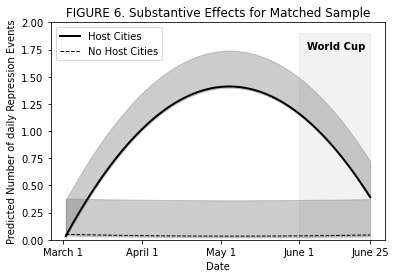

In [36]:
#Confidence intervals
ciu6 = ci6[1]
cil6 = ci6[0]

#Plot the daily repression event on host cities
plt.plot(n1["time"],n1['Sum'],label='Host Cities',color='black',linewidth=2,linestyle="-")

#Plot the daily repression event on non host cities
plt.plot(n2["time"],n2['Sum'],label='No Host Cities',color='black',linewidth=1,linestyle="--")

#Set y limit
plt.ylim(0, 2)

#Set x and y labels
plt.xlabel('Date')
plt.ylabel('Predicted Number of daily Repression Events')

#Set figure title
plt.title('FIGURE 6. Substantive Effects for Matched Sample', fontsize=12)

#Set x ticks and labels
plt.xticks([0.0,0.3,0.6,0.9,1.17],["March 1" ,"April 1" , "May 1" , "June 1" , "June 25"])

#Plot the confidence intervals on both the plots
plt.fill_between(n1["time"], (n1['Sum']- cil6), (n1['Sum']+ciu6), color='gray', alpha=0.4)
plt.fill_between(n2["time"], (n2['Sum']- cil6), (n2['Sum']+ciu6), color='gray', alpha=0.4)

#Set the legend position
plt.legend(loc ='upper left')

#Add World-cup patch
rect1 = patches.Rectangle((0.9, 0), width=0.27, height=1.9, color='grey', alpha=0.1)
plt.gca().add_patch(rect1)

#Add world-cup text
plt.text(0.93,1.75,"World Cup",weight='heavy')


#Show the final plot
plt.show()

#### Result Interpretation of the figure

The graph  shows the predicted numbers of daily repression events in departments with host cities and in other departments. The results in the graph are consistent with the researchers' theoretical expectations, showing that repression in host cities increased in the months leading up to the sports event, but dropped during the event, while repression in non-host cities remained at a consistently low level. 


In the context of the graph, the confidence intervals around the lines on the graph indicate the range of values within which the predicted numbers of daily repression events in departments with host cities and in other departments are likely to fall.The graph shows a 95% confidence interval around the line representing predicted repression events in host cities, this means that there is a 95% chance that the true population parameter (the predicted number of daily repression events in host cities) will fall within the range of values indicated by the confidence interval. Confidence intervals are used to provide a measure of uncertainty in statistical estimates, and can help to indicate the reliability and precision of the results.


This supports the idea that autocratic host regimes strategically adjust their repression according to the tournament schedule in order to prevent domestic resistance and embarrassment in front of the assembled world press. The results are also robust, as shown by the various robustness checks, including the use of different regression models, matched samples, and control variables. Overall, the graph and accompanying analyses provide strong evidence for the relationship between international sports events and repression in authoritarian host countries.


The size of a sample in a statistical analysis can affect the reliability and precision of the results, but other factors, such as the sampling method and the statistical models used, can also influence the accuracy of the findings. That's why we can accept the robustness checks as we find the same results using manual matching and OLS regression models. 